In [5]:
import generators
from matplotlib import pyplot as plt 
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import pandas as pd 
from importlib import reload
reload(generators)
None
from typing import List, Tuple
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
import torchvision.transforms as T

In [2]:
TORCH_CACHE_DIR = 'torch_cache'
DATASET_DIR = '/mnt/blendervol/objdet_std_data'
DATASET_DIR = '/mnt/blendervol/leftright_left_data'
SQL_TABLE = 'bboxes_std'
WEIGHTS_DIR = 'fish_statedicts'
NUM_CLASSES=6+1

gen = generators.TorchStereoDataset(
    data_dir = DATASET_DIR,
    table = SQL_TABLE,
    batch_size = 4,
    imgnrs = range(0,100),
    shuffle=False
)

In [7]:
x, y = next(iter(DataLoader(gen, batch_size=4, collate_fn = lambda x: tuple(zip(*x)))))

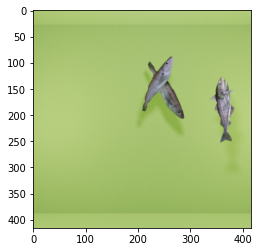

In [15]:
plt.imshow(x[0][0][0].permute((1,2,0)).numpy())

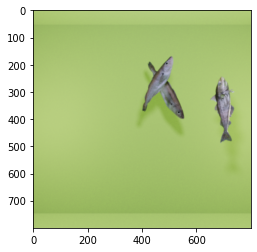

In [17]:
plt.imshow(T.Resize(800)(x[0][0][0]).permute((1,2,0)).numpy())

In [25]:
T.Resize(800)(torch.ones((3,900,1000))).shape

torch.Size([3, 800, 888])

In [29]:
C = T.Compose([
    T.Resize(800),
    T.Normalize([0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225])
])

In [32]:
C(torch.ones((3,100,100)))

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.